In [1]:
# CSC478 Final Project - Data Analysis
import os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Section 1: Explore the general characteristics of the data

# Load movieLens data
#path = 'C:\Users\Shawn\csc478\Movielens'
path = os.getcwd() + '/Movielens'
os.chdir(path)
users = pd.read_table('u.user',delimiter='|',header=None,names=["id","age","gender","job","zip code"])
movies = pd.read_table('u.item',delimiter='|',header=None, names=["id","title","rl_date","vrl_date","url",
                                                                 "unknown","Action","Adventure","Animation",
                                                                 "Children's","Comedy","Crime","Documentary",
                                                                 "Drama","Fantasy","Film-Noir","Horror",
                                                                 "Musical","Mystery","Romance","Sci-Fi",
                                                                 "Thriller","War","Western"])
ratings = pd.read_table('u.data',delimiter='\t',header=None,names=["user","movie","rating","timestamp"])
genres = pd.read_table('u.genre',delimiter='|',header=None,names=["genre","id"])

In [3]:
# Users data overview
print users.head(5)
users.describe(include="all")

   id  age gender         job zip code
0   1   24      M  technician    85711
1   2   53      F       other    94043
2   3   23      M      writer    32067
3   4   24      M  technician    43537
4   5   33      F       other    15213


,id,age,gender,job,zip code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


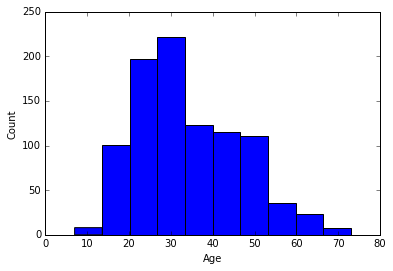

In [4]:
# Distribution of user ages
%matplotlib inline
plt.hist(users["age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [5]:
# As we can see, most of the users are between 20 - 30 year old.

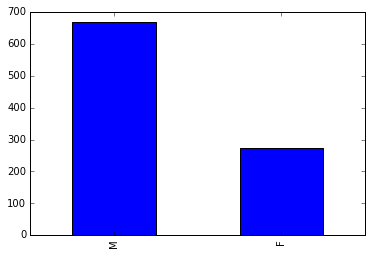

In [6]:
# Distribution of user genders
users.gender.value_counts().plot(kind='bar')

In [7]:
# As we can see, number of male users are twice as many as female users.

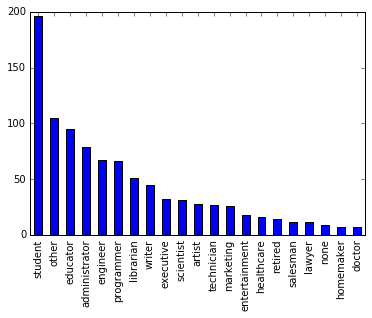

In [8]:
# Distribution of user professions
users.job.value_counts().plot(kind='bar')

In [9]:
# As we can see, most of the users are students.

In [10]:
# 0: id, 1: name, 2: relase date, 3: video release date, 4: url, 5-23: genre
# Movie data
movies.head(5)

,id,title,rl_date,vrl_date,url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# Movie data overview
movies.describe(include="all")

,id,title,rl_date,vrl_date,url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,1682,1681,0.0,1679,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
unique,NaN,1664,240,NaN,1660,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Money Talks (1997),01-Jan-1995,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,215,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,841.500000,NaN,NaN,NaN,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,NaN,NaN,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
# Rating data overview
print ratings.head(5)
ratings.describe(include="all")

   user  movie  rating  timestamp
0   196    242       3  881250949
1   186    302       3  891717742
2    22    377       1  878887116
3   244     51       2  880606923
4   166    346       1  886397596


,user,movie,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


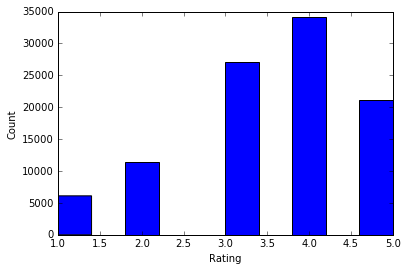

In [13]:
# Distribution of movie ratings(for different movies)
plt.hist(ratings["rating"])
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [14]:
# Genres of movie
print genres.head(5)
genres.describe(include="all")

        genre  id
0     unknown   0
1      Action   1
2   Adventure   2
3   Animation   3
4  Children's   4


,genre,id
count,19,19.000000
unique,19,NaN
top,Thriller,NaN
freq,1,NaN
mean,NaN,9.000000
std,NaN,5.627314
min,NaN,0.000000
25%,NaN,4.500000
50%,NaN,9.000000
75%,NaN,13.500000


In [15]:
# Section 2:  Correlation analysis

In [16]:
# Function that returns a Pandas dataframe which contains "user age" vs "rating"
# for a specific genre. 
def get_age_rating(genre, users, movies, ratings):
    columns = ['Age','Rating']
    df = pd.DataFrame(columns = columns)
    i = 0
    for j in range(0, len(ratings)):
        user_id = ratings['user'][j]
        movie_id = ratings['movie'][j]
        if movies[genre][movie_id - 1] == 1:
            df.loc[i] = [users['age'][user_id - 1], ratings['rating'][j]]
            i += 1
    return df

In [17]:
# Try to compute correlation between "user age" and "rating" for every genre
for g in range (0, len(genres)):
    genre = genres['genre'][g]
    if genre == 'unknown': continue
    df = get_age_rating(genre, users, movies, ratings)
    print genre
    print df.corr()
    print "--------------------------"

Action
             Age    Rating
Age     1.000000  0.035673
Rating  0.035673  1.000000
--------------------------
Adventure
            Age   Rating
Age     1.00000  0.03925
Rating  0.03925  1.00000
--------------------------
Animation
             Age    Rating
Age     1.000000  0.005057
Rating  0.005057  1.000000
--------------------------
Children's
             Age    Rating
Age     1.000000  0.030133
Rating  0.030133  1.000000
--------------------------
Comedy
             Age    Rating
Age     1.000000  0.052634
Rating  0.052634  1.000000
--------------------------
Crime
             Age    Rating
Age     1.000000  0.020069
Rating  0.020069  1.000000
--------------------------
Documentary
             Age    Rating
Age     1.000000 -0.007683
Rating -0.007683  1.000000
--------------------------
Drama
             Age    Rating
Age     1.000000  0.041616
Rating  0.041616  1.000000
--------------------------
Fantasy
             Age    Rating
Age     1.000000  0.146741
Rating  0.1

In [18]:
# Observations:
# 1. The correlations between "user age" and "rating" across every genre is not strong.
# 2. Genres with highest correlations are:
#    "Fantasy":   0.147
#    "Western":   0.131
#    "Film-Noir": 0.105
# That means the elder the user, the more they love Fantasy, Western and Film-Noir movies.
# 3. Another interesting finding is elder user tend to give higher ratings because most
#    of the correlations are possitive numbers except for Documentary and Horror genres.

In [20]:
genre = 'Fantasy'
df = get_age_rating(genre, users, movies, ratings)

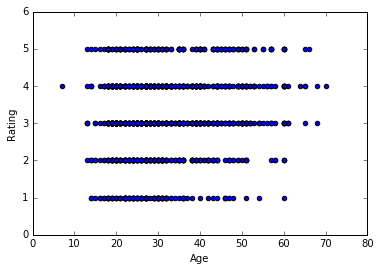

In [21]:
df.plot(x="Age", y="Rating", kind="scatter")

In [22]:
# As we can see, lower ratings to Fantasy movies were mostly given by young users.

In [23]:
# Section 3: Classification and Prediction

# Try to experiment the movie data set with various classifiers
# The idea is to generate a user to movie_rating matrix and use
# it to find similiar users/groups to a given user. Then try to
# guess user's occupation.

In [24]:
# Generate user to movie_rating matrix.
UR = np.zeros((len(users), len(movies)))
UR.shape

(943L, 1682L)

In [25]:
for i in range(len(ratings)):
    user_id = ratings['user'][i]
    movie_id = ratings['movie'][i]
    rating = ratings['rating'][i]
    UR[user_id - 1][movie_id - 1] = rating

In [26]:
UR[195, 241]

3.0

In [27]:
# Occupation as the target
UR_target = np.genfromtxt("u.user", delimiter="|", usecols=(3), dtype=('|S13'))

In [28]:
UR_target[:10]

array(['technician', 'other', 'writer', 'technician', 'other', 'executive',
       'administrator', 'administrator', 'student', 'lawyer'], 
      dtype='|S13')

In [29]:
# Split to 80% 20% train and test data sets
from sklearn.cross_validation import train_test_split
UR_train, UR_test, UR_target_train, UR_target_test = train_test_split(UR, UR_target, test_size=0.2, random_state=33)

In [30]:
print UR_train.shape, UR_test.shape
print UR_test[0:3]

(754L, 1682L) (189L, 1682L)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 4.  2.  2. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]]


In [31]:
# Create our own KNN classifier. It allows input the training data matrix, the training labels, 
# the user to be classified, the value of K, and returns the predicted occupation for the user
# and the top K neighbors. It works with Euclidean distance as well as Cosine Similarity.
from numpy import *
import operator
def classify(inX, dataSet, labels, k, distance):
    if distance == 'Euclidean':
        dataSetSize = dataSet.shape[0]
        diffMat = tile(inX, (dataSetSize,1)) - dataSet
        sqDiffMat = diffMat**2
        sqDistances = sqDiffMat.sum(axis=1)
        distances = sqDistances**0.5
    elif distance == 'Cosine':
        D_norm = array([linalg.norm(dataSet[i]) for i in range(len(dataSet))])
        x_norm = linalg.norm(inX)
        sims = dot(dataSet,inX)/(D_norm * x_norm)
        distances = 1 - sims
    else:
        return '', 0
    idx = np.argsort(distances)
    classCount={}
    for i in range(k):
        votelabel = labels[idx[i]]
        classCount[votelabel] = classCount.get(votelabel,0) + 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0], idx[0:k]

In [32]:
# Create a function to compute the classification accuracy over the test data set
# (ratio of correct predictions to the number of test instances). This function
# will call the classifier function on all the test instances and in each case
# compares the actual test class label to the predicted class label.
def accuracy(testDataSet, testLabelsSet, trainDataSet, trainLabelsSet, k, distance):
    crctNum = 0.0
    for idx in range(testDataSet.shape[0]):
        label, topK = classify(testDataSet[idx], trainDataSet, trainLabelsSet, k, distance)
        if(label == testLabelsSet[idx]):
            crctNum += 1.0
    return crctNum/testDataSet.shape[0]

In [32]:
# Run the accuracy function on a range of values for K in order to compare accuracy
# values for different numbers of neighbors. Do this both using Euclidean Distance
# as well as Cosine similarity measure. Try to evaluating our classifiers on a range
# of values of K from 1 through 201 and present the results as a table or a graph.

In [33]:
accuEuclidean = [accuracy(UR_test, UR_target_test, UR_train, UR_target, k, 'Euclidean') for k in range(1,201,10)]
print accuEuclidean

[0.09523809523809523, 0.09523809523809523, 0.14814814814814814, 0.19047619047619047, 0.2222222222222222, 0.24338624338624337, 0.23809523809523808, 0.24867724867724866, 0.2275132275132275, 0.2222222222222222, 0.2222222222222222, 0.23809523809523808, 0.2275132275132275, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328]


In [34]:
accuCosine = [accuracy(UR_test, UR_target_test, UR_train, UR_target, k, 'Cosine') for k in range(1,201,10)]
print accuCosine

[0.10582010582010581, 0.1693121693121693, 0.164021164021164, 0.21693121693121692, 0.2328042328042328, 0.2275132275132275, 0.2222222222222222, 0.23809523809523808, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328, 0.2328042328042328]


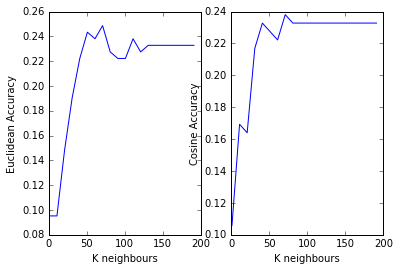

In [35]:
%matplotlib inline
X = np.array(range(1,201,10))
plt.subplot(121)
plt.plot(X, np.array((accuEuclidean)))
plt.xlabel('K neighbours')
plt.ylabel('Euclidean Accuracy')
plt.subplot(122)
plt.plot(X, np.array((accuCosine)))
plt.xlabel('K neighbours')
plt.ylabel('Cosine Accuracy')
plt.show()

In [36]:
# Observation:
# 1. When k=71, we get highest accuracy for both Euclidean and Cosine distance.
# 2. This predictive model is not very good because the relationship between
#    user's rating and his/her occcupation is not very strong.

In [37]:
# Create a classifier based on the Rocchio Method. The classifier takes as input
# the training data matrix, the training labels, and the user to be classified.
# It computes the prototype vectors for each of the occupation and measure Cosine
# similarity of the test instance to each prototype. The output includes the
# predicted class and the similarity values of the instance to each of the occupation
# prototypes.

def Rocchio_classifier(inX, dataSet, labels):
    classes = list(set(labels))
    proto_vecs = {}
    for i in range(len(classes)):
        proto_vecs[classes[i]] = np.zeros(dataSet.shape[1])

    for i in range(len(dataSet)):
        proto_vecs[labels[i]] += dataSet[i]

    maxSim = float(-2)
    c = None
    x_norm = np.linalg.norm(inX)
    for i in range(len(classes)):
        d_norm = np.linalg.norm(proto_vecs[classes[i]])
        sim = np.dot(proto_vecs[classes[i]], inX) / (d_norm * x_norm)
        if np.all(sim > maxSim):
            maxSim = sim
            c = classes[i]
    return [c, maxSim]

In [38]:
# Compute the classification accuracy using the test instances.
def accuracy2(testDataSet, testLabelsSet, trainDataSet, trainLabelsSet):
    crctNum = 0.0
    for i in range(len(testDataSet)):
        result = Rocchio_classifier(testDataSet[i], trainDataSet, trainLabelsSet)[0]
        if (result == testLabelsSet[i]):
            crctNum += 1.0
    return crctNum / testDataSet.shape[0]

In [39]:
accuracy2(UR_test, UR_target_test, UR_train, UR_target_train)

0.14285714285714285

In [40]:
# Try scikit-learn's KNN classifier on the data set. Generate the confusion matrix
# and visualize it using Matplotlib, as well as the classification report. Compute
# the average accuracy score. Experiment with different values of K and the weight
# parameter for KNN to see if we can improve accuracy.

In [41]:
from sklearn import preprocessing

In [42]:
min_max_scaler = preprocessing.MinMaxScaler().fit(UR_train)
UR_train_norm = min_max_scaler.transform(UR_train)
UR_test_norm = min_max_scaler.transform(UR_test)

In [43]:
UR_test_norm

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.8,  0.4,  0.4, ...,  0. ,  0. ,  0. ],
       [ 0.8,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0.8,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [44]:
from sklearn import neighbors, tree, naive_bayes

In [45]:
n_neighbors = 70
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(UR_train_norm, UR_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=70, p=2,
           weights='distance')

In [46]:
knnpreds_test = knnclf.predict(UR_test_norm)

In [47]:
print knnpreds_test

['student' 'student' 'educator' 'student' 'student' 'student' 'educator'
 'student' 'student' 'student' 'student' 'educator' 'other' 'student'
 'student' 'student' 'student' 'student' 'student' 'student' 'student'
 'student' 'student' 'student' 'student' 'student' 'student' 'student'
 'student' 'student' 'student' 'student' 'student' 'student' 'student'
 'other' 'educator' 'student' 'student' 'student' 'programmer' 'student'
 'educator' 'educator' 'student' 'student' 'other' 'student' 'engineer'
 'student' 'educator' 'student' 'educator' 'student' 'student' 'student'
 'student' 'student' 'student' 'educator' 'student' 'educator' 'student'
 'student' 'student' 'student' 'educator' 'student' 'student' 'student'
 'student' 'student' 'student' 'student' 'student' 'student' 'student'
 'student' 'student' 'student' 'student' 'student' 'student' 'educator'
 'student' 'educator' 'student' 'other' 'administrator' 'student'
 'educator' 'educator' 'student' 'student' 'engineer' 'student' 'student

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(UR_target_test, knnpreds_test))

             precision    recall  f1-score   support

administrator       0.17      0.08      0.11        12
     artist       0.00      0.00      0.00         7
   educator       0.22      0.26      0.24        27
   engineer       0.00      0.00      0.00        14
  executive       0.00      0.00      0.00         7
 healthcare       0.00      0.00      0.00         2
  homemaker       0.00      0.00      0.00         1
     lawyer       0.00      0.00      0.00         1
  librarian       0.00      0.00      0.00        12
  marketing       0.00      0.00      0.00         4
       none       0.00      0.00      0.00         2
      other       0.00      0.00      0.00        21
 programmer       0.00      0.00      0.00        13
    retired       0.00      0.00      0.00         3
  scientist       0.00      0.00      0.00         5
    student       0.28      0.89      0.43        44
 technician       0.00      0.00      0.00         4
     writer       0.00      0.00      0.00 

D:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
knncm = (confusion_matrix(UR_target_test, knnpreds_test))
print knncm

[[ 1  0  1  1  0  0  0  0  0  0  0  0  1  0  0  8  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0]
 [ 2  0  7  1  0  0  0  0  0  0  0  1  0  0  0 16  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  1  2  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 1  0  5  1  0  0  0  0  0  0  0  0  1  0  0 13  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 12  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 1  0  4  0  0  0  0  0  0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  3  0  0  0  0  0  0  0

In [52]:
print knnclf.score(UR_test_norm, UR_target_test)

0.248677248677


In [53]:
print knnclf.score(UR_train_norm, UR_target_train)

1.0


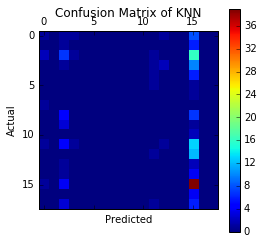

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion Matrix of KNN')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [55]:
def calcScore(UR_train_norm, UR_test_norm, UR_target_train, UR_target_test, k, w):
    knnclf = neighbors.KNeighborsClassifier(k, weights = w)
    knnclf.fit(UR_train_norm, UR_target_train)
    return knnclf.score(UR_test_norm, UR_target_test)

In [56]:
bestK = 0
weight = ''
bestScore = 0.0
for k in range(1, 201, 10):
    for w in ['uniform', 'distance']:
        score = calcScore(UR_train_norm, UR_test_norm, UR_target_train, UR_target_test, k, w)
        if score > bestScore:
            bestScore = score
            bestK = k
            weight = w
print bestK, weight, bestScore

31 distance 0.253968253968


In [57]:
# As we can see from above result, best accuracy achieved when we use k = 31 and weight = 'distance'.

In [58]:
# Try scikit-learn's decision tree classifier (using the default parameters) and the
# naive Bayes (Gaussian) classifier.

In [63]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=5)
treeclf = treeclf.fit(UR_train, UR_target_train)
treepreds_test = treeclf.predict(UR_test)

In [64]:
print treepreds_test

['engineer' 'programmer' 'engineer' 'marketing' 'librarian' 'programmer'
 'administrator' 'programmer' 'marketing' 'administrator' 'student'
 'educator' 'engineer' 'administrator' 'student' 'educator' 'engineer'
 'student' 'marketing' 'writer' 'executive' 'engineer' 'engineer' 'other'
 'other' 'administrator' 'student' 'lawyer' 'engineer' 'educator'
 'technician' 'technician' 'other' 'engineer' 'student' 'engineer' 'artist'
 'other' 'student' 'executive' 'programmer' 'engineer' 'educator'
 'engineer' 'none' 'student' 'other' 'programmer' 'student' 'other'
 'student' 'student' 'student' 'administrator' 'lawyer' 'executive'
 'student' 'engineer' 'student' 'administrator' 'student' 'educator'
 'entertainment' 'programmer' 'programmer' 'engineer' 'student' 'student'
 'student' 'other' 'student' 'student' 'administrator' 'educator'
 'educator' 'technician' 'student' 'student' 'administrator' 'lawyer'
 'student' 'technician' 'student' 'entertainment' 'educator' 'scientist'
 'educator' 'admin

In [65]:
print treeclf.score(UR_test, UR_target_test)

0.121693121693


In [66]:
print treeclf.score(UR_train, UR_target_train)

0.790450928382


In [68]:
print(classification_report(UR_target_test, treepreds_test))

             precision    recall  f1-score   support

administrator       0.00      0.00      0.00        12
     artist       0.00      0.00      0.00         7
   educator       0.24      0.15      0.18        27
   engineer       0.04      0.07      0.05        14
entertainment       0.00      0.00      0.00         0
  executive       0.00      0.00      0.00         7
 healthcare       0.00      0.00      0.00         2
  homemaker       0.00      0.00      0.00         1
     lawyer       0.00      0.00      0.00         1
  librarian       0.17      0.08      0.11        12
  marketing       0.00      0.00      0.00         4
       none       0.00      0.00      0.00         2
      other       0.12      0.10      0.11        21
 programmer       0.00      0.00      0.00        13
    retired       0.00      0.00      0.00         3
   salesman       0.00      0.00      0.00         0
  scientist       0.11      0.20      0.14         5
    student       0.25      0.30      0.2

In [69]:
treecm = confusion_matrix(UR_target_test, treepreds_test)
print treecm

[[ 0  0  1  0  1  3  0  0  1  1  0  0  0  1  0  0  1  2  0  1]
 [ 0  0  0  1  0  1  0  0  0  0  0  0  1  1  0  0  1  2  0  0]
 [ 1  1  4  3  1  0  0  0  0  1  1  0  4  2  0  0  1  6  2  0]
 [ 1  1  1  1  0  0  1  0  0  1  0  0  1  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  3  0  0  0  0  0  0  1  1  1  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  3  1  0  1  1  0  0  1  1  0  0  0  0  0  0  1  1  1]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 2  0  1  2  1  1  0  0  1  0  1  0  2  0  0  0  1  7  1  1]
 [ 0  0  0  4  0  1  0  0  0  0  0  0  3  0  0  0  0  3  2  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

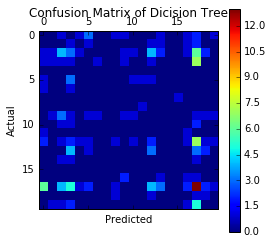

In [70]:
plt.matshow(treecm)
plt.title('Confusion Matrix of Dicision Tree')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [71]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(UR_train, UR_target_train)
nbpreds_test = nbclf.predict(UR_test)

In [72]:
print nbpreds_test

['artist' 'student' 'educator' 'educator' 'other' 'other' 'administrator'
 'administrator' 'healthcare' 'programmer' 'student' 'educator' 'student'
 'engineer' 'student' 'healthcare' 'student' 'executive' 'other' 'engineer'
 'student' 'writer' 'other' 'student' 'writer' 'administrator'
 'administrator' 'administrator' 'student' 'student' 'writer' 'student'
 'executive' 'student' 'administrator' 'scientist' 'executive' 'student'
 'other' 'student' 'educator' 'student' 'student' 'artist' 'student'
 'artist' 'executive' 'healthcare' 'student' 'student' 'librarian'
 'engineer' 'executive' 'student' 'engineer' 'artist' 'student' 'student'
 'librarian' 'educator' 'technician' 'healthcare' 'entertainment' 'other'
 'student' 'technician' 'other' 'engineer' 'executive' 'student'
 'technician' 'student' 'librarian' 'educator' 'student' 'student'
 'student' 'executive' 'student' 'other' 'student' 'salesman' 'student'
 'scientist' 'engineer' 'educator' 'student' 'administrator' 'other'
 'other' 'e

In [73]:
print nbclf.score(UR_train, UR_target_train)

0.685676392573


In [74]:
print nbclf.score(UR_test, UR_target_test)

0.174603174603


In [75]:
print(classification_report(UR_target_test, nbpreds_test))

             precision    recall  f1-score   support

administrator       0.07      0.08      0.08        12
     artist       0.00      0.00      0.00         7
   educator       0.24      0.19      0.21        27
   engineer       0.15      0.14      0.15        14
entertainment       0.00      0.00      0.00         0
  executive       0.00      0.00      0.00         7
 healthcare       0.00      0.00      0.00         2
  homemaker       0.00      0.00      0.00         1
     lawyer       0.00      0.00      0.00         1
  librarian       0.10      0.08      0.09        12
  marketing       0.00      0.00      0.00         4
       none       0.00      0.00      0.00         2
      other       0.00      0.00      0.00        21
 programmer       0.00      0.00      0.00        13
    retired       0.00      0.00      0.00         3
   salesman       0.00      0.00      0.00         0
  scientist       0.00      0.00      0.00         5
    student       0.41      0.55      0.4

In [76]:
nbcm = (confusion_matrix(UR_target_test, nbpreds_test))
print nbcm

[[ 1  1  2  0  0  0  0  0  0  0  0  1  3  0  0  1  0  2  0  1]
 [ 2  0  0  2  0  1  0  0  0  0  0  0  1  0  0  0  0  1  0  0]
 [ 1  1  5  1  1  2  0  0  0  3  0  0  1  0  1  1  1  6  2  1]
 [ 1  0  0  2  0  1  0  0  0  2  0  0  2  2  0  0  0  2  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  1  0  0  0  0  3  0  1]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  1  2  1  0  0  2  0  0  1  0  0  1  0  0  0  0  1  0  2]
 [ 0  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 5  1  3  1  1  2  0  0  0  0  0  0  0  1  0  0  0  6  0  1]
 [ 0  0  0  0  0  2  0  0  0  1  0  0  0  0  0  0  1  9  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

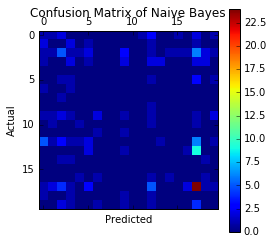

In [77]:
plt.matshow(nbcm)
plt.title('Confusion Matrix of Naive Bayes')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [78]:
# Summary of classification & prediction accuracy results:
#    Classifier           Parameters           Accuracy
# 1. Self-dev kNN         k=71, Euclidean      24.9%
# 2. Self-dev Rocchio     -                    14.3%
# 3. Scikit-learn kNN     k=31, distance       25.4%
# 4. Scikit-learn tree    entropy, split=5     13.8%
# 5. Scikit-learn NB      -                    17.5%

In [79]:
# Section 4: Clustering
# We will try to perform K-means clustering on the movie training data. Display the top 3
# genres in each cluster, percentage of movies in the cluster in which the genre appear,
# and the size of the cluster. Using the cluster assignments as class labels, categorize
# each of the movie in the test data into each of the appropriate cluster. 

In [80]:
# Prepare data
movie_genres = np.genfromtxt("u.item", delimiter="|", usecols=tuple(range(5, 24)))
movie_ids = np.genfromtxt("u.item", delimiter="|", usecols=(0))

In [81]:
print movie_genres.shape
print movie_ids.shape

(1682L, 19L)
(1682L,)


In [82]:
MG_train, MG_test, MG_id_train, MG_id_test = train_test_split(movie_genres, movie_ids, test_size=0.2)

In [83]:
print MG_train.shape
print MG_test.shape

(1345L, 19L)
(337L, 19L)


In [84]:
genres = np.genfromtxt("u.genre", delimiter="|", usecols=(0), dtype=('|S15'))

In [85]:
import kMeans

In [86]:
def distCosine(vecA, vecB):
    return 1 - ((np.dot(vecA, vecB)) / (np.linalg.norm(vecA) * np.linalg.norm(vecB)))

In [87]:
# Let's first try to group movies into 5 clusters
centroids5, clusters5 = kMeans.kMeans(MG_train, 5, distCosine, kMeans.randCent)

In [88]:
centroids5

array([[ 0.        ,  0.04835165,  0.01758242,  0.        ,  0.03296703,
         0.        ,  0.06813187,  0.08131868,  0.92307692,  0.00659341,
         0.0043956 ,  0.00879121,  0.01538462,  0.01758242,  0.        ,
         0.01098901,  0.07912088,  0.05714286,  0.00659341],
       [ 0.        ,  0.51916376,  0.29268293,  0.01393728,  0.09059233,
         0.01045296,  0.12891986,  0.        ,  0.03832753,  0.03135889,
         0.05923345,  0.07317073,  0.00348432,  0.1010453 ,  0.03135889,
         0.22299652,  0.49825784,  0.03135889,  0.00696864],
       [ 0.02325581,  0.03488372,  0.        ,  0.        ,  0.01162791,
         0.8255814 ,  0.04651163,  0.        ,  0.8255814 ,  0.        ,
         0.        ,  0.        ,  0.01162791,  0.01162791,  0.10465116,
         0.        ,  0.01162791,  0.02325581,  0.15116279],
       [ 0.        ,  0.05637982,  0.02373887,  0.02373887,  0.10385757,
         1.        ,  0.02077151,  0.00296736,  0.        ,  0.01780415,
         0.   

In [89]:
clusters5

array([[ 2.        ,  0.07739337],
       [ 1.        ,  0.16423579],
       [ 3.        ,  0.02862056],
       ..., 
       [ 0.        ,  0.07745213],
       [ 4.        ,  0.01154701],
       [ 4.        ,  0.01154701]])

In [90]:
def display(clusters, movie_genres, MG_id, genres, number_clusters):
    number_genres = movie_genres.shape[1]
    cluster_genre = np.zeros((number_clusters, number_genres))
    cluster_size = np.zeros((number_clusters))
    for i in range(len(clusters)):
        cluster_id = int(clusters[i][0])
        cluster_size[cluster_id] += 1
        movie_id = int(MG_id[i])
        for j in range(number_genres):
            if movie_genres[movie_id - 1][j] == 0: continue
            cluster_genre[cluster_id][j] += 1
    for k in range(number_clusters):
        print "Cluster %d:"%k
        print "Cluster size: %d"%cluster_size[k]
        idx = np.argsort(cluster_genre[k])
        print "Top three genres:"
        for p in range(-1, -4, -1):
            print "%-15s\t%d\t\t%f"%(genres[idx[p]], cluster_genre[k][idx[p]], cluster_genre[k][idx[p]]/ cluster_size[k])
        print "------------------------------------------------------"

In [91]:
display(clusters5, movie_genres, MG_id_train, genres, 5)

Cluster 0:
Cluster size: 455
Top three genres:
Drama          	420		0.923077
Documentary    	37		0.081319
Thriller       	36		0.079121
------------------------------------------------------
Cluster 1:
Cluster size: 287
Top three genres:
Action         	149		0.519164
Thriller       	143		0.498258
Adventure      	84		0.292683
------------------------------------------------------
Cluster 2:
Cluster size: 86
Top three genres:
Comedy         	71		0.825581
Drama          	71		0.825581
Western        	13		0.151163
------------------------------------------------------
Cluster 3:
Cluster size: 337
Top three genres:
Comedy         	337		1.000000
Romance        	72		0.213650
Children's     	35		0.103858
------------------------------------------------------
Cluster 4:
Cluster size: 180
Top three genres:
Romance        	113		0.627778
Drama          	69		0.383333
Horror         	35		0.194444
------------------------------------------------------


In [92]:
# As we can see from above results, when we group movies to 5 clusters,
# each cluster will have 1 or 2 dominated genres.

In [93]:
# Let's try to group movies into 10 clusters
centroids10, clusters10 = kMeans.kMeans(MG_train, 10, distCosine, kMeans.randCent)

In [94]:
display(clusters10, movie_genres, MG_id_train, genres, 10)

Cluster 0:
Cluster size: 33
Top three genres:
Animation      	29		0.878788
Children's     	28		0.848485
Musical        	18		0.545455
------------------------------------------------------
Cluster 1:
Cluster size: 103
Top three genres:
Thriller       	103		1.000000
Drama          	37		0.359223
Crime          	21		0.203883
------------------------------------------------------
Cluster 2:
Cluster size: 103
Top three genres:
Children's     	62		0.601942
Adventure      	39		0.378641
Documentary    	34		0.330097
------------------------------------------------------
Cluster 3:
Cluster size: 291
Top three genres:
Comedy         	291		1.000000
Romance        	70		0.240550
Action         	16		0.054983
------------------------------------------------------
Cluster 4:
Cluster size: 152
Top three genres:
Action         	139		0.914474
Thriller       	66		0.434211
Adventure      	51		0.335526
------------------------------------------------------
Cluster 5:
Cluster size: 52
Top three genres:
War    

In [95]:
# As we can see from above results, when we group movies to 10 clusters,
# each cluster will have 1 or 2 dominated genres but the percentage of
# the 1st one appears more than the 2nd one. (Stronger domination)

In [96]:
# Try to categorize each of the movies in the 20% set-aside data into
# each of the 5 cluster. Categorization is based on Cosine similarity
# between each test movie and each cluster centroids. Print the results
# with the obtained cluster id for each test movie as well as Cosine
# similarities between each test movie and each of the 5 clusters.

In [97]:
def Cosine(vecA, vecB):
    return np.dot(vecA, vecB) / (np.linalg.norm(vecA) * np.linalg.norm(vecB))

In [98]:
print "Assignment\tSim_C0\t\tSim_C1\t\tSim_C2\t\tSim_C3\t\tSim_C4"
for instance in MG_test:
    #compute the similarity of each centroids
    cos_list = np.array(np.zeros(len(centroids5)), dtype=float)
    for i in range(len(centroids5)):
        cos_list[i] = Cosine(centroids5[i], instance)
    print "Cluster%d\t%.4f\t\t%.4f\t\t%.4f\t\t%.4f\t\t%.4f"%(cos_list.argmax(), cos_list[0], cos_list[1],cos_list[2],cos_list[3],cos_list[4])

Assignment	Sim_C0		Sim_C1		Sim_C2		Sim_C3		Sim_C4
Cluster0	0.9854		0.0457		0.6973		0.0000		0.4785
Cluster0	0.9854		0.0457		0.6973		0.0000		0.4785
Cluster1	0.0664		0.4823		0.0069		0.0305		0.2109
Cluster3	0.0000		0.0125		0.6973		0.9681		0.0000
Cluster1	0.0845		0.5947		0.0098		0.0230		0.0555
Cluster0	0.9854		0.0457		0.6973		0.0000		0.4785
Cluster1	0.0555		0.1993		0.0283		0.0249		0.0320
Cluster0	0.0868		0.0000		0.0000		0.0029		0.0000
Cluster0	0.7565		0.4529		0.5000		0.0163		0.3776
Cluster4	0.6968		0.0588		0.5555		0.1463		0.8925
Cluster0	0.0868		0.0000		0.0000		0.0029		0.0000
Cluster0	0.9854		0.0457		0.6973		0.0000		0.4785
Cluster3	0.0095		0.0312		0.4593		0.7049		0.5205
Cluster0	0.9854		0.0457		0.6973		0.0000		0.4785
Cluster3	0.0000		0.0125		0.6973		0.9681		0.0000
Cluster0	0.9854		0.0457		0.6973		0.0000		0.4785
Cluster1	0.0149		0.2500		0.0000		0.0284		0.1765
Cluster0	0.9854		0.0457		0.6973		0.0000		0.4785
Cluster1	0.0894		0.9029		0.0227		0.0581		0.0961
Cluster3	0.0000		0.0125		0.6973		0.968

In [104]:
# Section 5. Item-Based collaborative filtering

In [105]:
# Prepare data
movie_names = np.genfromtxt("u.item", delimiter="|", usecols=(1), dtype=('|S50'))

In [106]:
movie_names

array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
       'Sliding Doors (1998)', 'You So Crazy (1994)',
       'Scream of Stone (Schrei aus Stein) (1991)'], 
      dtype='|S50')

In [107]:
movie_names.shape

(1682L,)

In [108]:
from numpy import *
from numpy import linalg as la
import numpy as np

def ecludSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

def pearsSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

def cosSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)

def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(dataMat[:,item]>0, \
                                      dataMat[:,j]>0))[0]
        if len(overLap) == 0: similarity = 0
        else: similarity = simMeas(dataMat[overLap,item], \
                                   dataMat[overLap,j])
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal
    
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig4 = mat(eye(4)*Sigma[:4]) #arrange Sig4 into a diagonal matrix
    xformedItems = data.T * U[:,:4] * Sig4.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T,\
                             xformedItems[j,:].T)
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

# This function is not needed for Assignment 4, but may be useful for experimentation
def recommend(dataMat, user, N=3, simMeas=cosSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

# This function performs cross-validation on a single user based on the test_ratio
# For example, with test_ratio = 0.2, 5-fold x-validation is performed where in each fold, 
# 20 percent of rated items are withheld and the rest are used to estimate the withheld ratings

def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsSim):
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = test_ratio * len(rated_items_by_user)
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])
        
    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]

    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

In [109]:
# Create a function "test". This function iterates over all users and for each performs
# cross-validation on movies (by calling the provided "cross_validate_user" function),
# and returns the error information necessary to compute Mean Absolute Error (MAE).
# Perform 5-fold cross-validation (20% test-ratio) and compute MAE results using standard
# item-based collaborative filtering (based on the rating prediction function "standEst").

In [110]:
def test(dataMat, test_ratio, estMethod):
    # Write this function to iterate over all users and for each perform cross-validation on items by calling
    # the above cross-validation function on each user.
    # MAE will be the ratio of total error across all test cases to the total number of test cases, for all users
    err_total = 0.0
    cnt_total = 0
    for userID in range(len(dataMat)):
        #print userID
        err, count = cross_validate_user(dataMat, userID, test_ratio, estMethod=estMethod)
        if isnan(err): continue
        err_total += err
        cnt_total += count
    MAE = err_total / float(cnt_total)
    print 'Mean Absoloute Error for ',estMethod,' : ', MAE

In [111]:
UR.shape

(943L, 1682L)

In [112]:
UR

array([[ 5.,  3.,  4., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.]])

In [113]:
test(UR, 0.2, standEst)

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:67: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Mean Absoloute Error for  <function standEst at 0x000000000E679CF8>  :  0.799206095239


In [114]:
# Create a function "print_most_similar_movies" which takes the movie ratings data,
# a query movie id, a parameter k for the number of nearest neighbors, and a similarity
# metric function, and prints the names of the query movie as well as the names of the
# top k most similar movies based on user ratings.

In [115]:
def print_most_similar_movies(dataMat, movies, queryMovie, k, metric=pearsSim):
    print 'Selected movie: \n'
    print movies[queryMovie]
    
    simVec = zeros(dataMat.shape[1])
    for movieID in range(dataMat.shape[1]):
        if movieID == queryMovie:
            continue
        simVec[movieID] = metric(dataMat[:,movieID], dataMat[:, queryMovie])
    #print jokes[simVec.argsort()[::-1][:k]]
    sortedVec = simVec.argsort()[::-1]
    print '\nTop 5 Recommended movies are :\n'
    for i in range(k):
        print movies[sortedVec[i]], '\n__________________________________\n'

In [116]:
print_most_similar_movies(UR, movie_names, 49, 5, pearsSim)

Selected movie: 

Star Wars (1977)

Top 5 Recommended movies are :

Return of the Jedi (1983) 
__________________________________

Empire Strikes Back, The (1980) 
__________________________________

Raiders of the Lost Ark (1981) 
__________________________________

Indiana Jones and the Last Crusade (1989) 
__________________________________

Toy Story (1995) 
__________________________________



In [117]:
print_most_similar_movies(UR, movie_names, 68, 5, pearsSim)

Selected movie: 

Forrest Gump (1994)

Top 5 Recommended movies are :

E.T. the Extra-Terrestrial (1982) 
__________________________________

Apollo 13 (1995) 
__________________________________

Dances with Wolves (1990) 
__________________________________

Raiders of the Lost Ark (1981) 
__________________________________

Back to the Future (1985) 
__________________________________



In [118]:
# End of Data Analysis